In [32]:
import os
import sys
import warnings

Path = '/remote/tychodata/ftairli/work/Projects/ProfileReconstruction/Code/'
if Path not in sys.path: sys.path.append(Path)
warnings.filterwarnings('ignore')
    
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import torch


In [2]:
# Profile Data
# Height [m]
height = np.array([
    0.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0,
    8000.0, 9000.0, 10000.0, 11000.0, 12000.0, 13000.0, 14000.0,
    15000.0, 16000.0, 17000.0, 18000.0, 19000.0, 20000.0, 21000.0,
    22000.0, 23000.0, 24000.0, 25000.0, 26000.0, 27000.0, 28000.0,
    29000.0, 30000.0, 100000.0
])

# Density [g/cm^3]
density = np.array([
    1.23E-03, 1.11E-03, 1.01E-03, 9.09E-04, 8.19E-04, 7.36E-04, 6.60E-04,
    5.90E-04, 5.25E-04, 4.66E-04, 4.13E-04, 3.64E-04, 3.11E-04, 2.66E-04,
    2.27E-04, 1.94E-04, 1.65E-04, 1.41E-04, 1.21E-04, 1.03E-04, 8.80E-05,
    7.49E-05, 6.37E-05, 5.43E-05, 4.63E-05, 3.95E-05, 3.37E-05, 2.88E-05,
    2.46E-05, 2.10E-05, 1.80E-05, 1.0e-09
])

pressure = np.array([
    1013.25, 898.7, 795.0, 701.1, 616.4, 540.2, 471.8, 410.6, 356.0,
    307.4, 264.4, 226.3, 193.3, 165.1, 141.0, 120.4, 102.9, 87.87,
    75.05, 64.10, 54.75, 46.78, 40.00, 34.22, 29.30, 25.11, 21.53,
    18.47, 15.86, 13.63, 11.72, 0.001
])

In [21]:
for h,d in zip(height,density):
    print(f'{h:10.1f} , {d:10.6f}')

       0.0 ,   0.001230
    1000.0 ,   0.001110
    2000.0 ,   0.001010
    3000.0 ,   0.000909
    4000.0 ,   0.000819
    5000.0 ,   0.000736
    6000.0 ,   0.000660
    7000.0 ,   0.000590
    8000.0 ,   0.000525
    9000.0 ,   0.000466
   10000.0 ,   0.000413
   11000.0 ,   0.000364
   12000.0 ,   0.000311
   13000.0 ,   0.000266
   14000.0 ,   0.000227
   15000.0 ,   0.000194
   16000.0 ,   0.000165
   17000.0 ,   0.000141
   18000.0 ,   0.000121
   19000.0 ,   0.000103
   20000.0 ,   0.000088
   21000.0 ,   0.000075
   22000.0 ,   0.000064
   23000.0 ,   0.000054
   24000.0 ,   0.000046
   25000.0 ,   0.000039
   26000.0 ,   0.000034
   27000.0 ,   0.000029
   28000.0 ,   0.000025
   29000.0 ,   0.000021
   30000.0 ,   0.000018
  100000.0 ,   0.000000


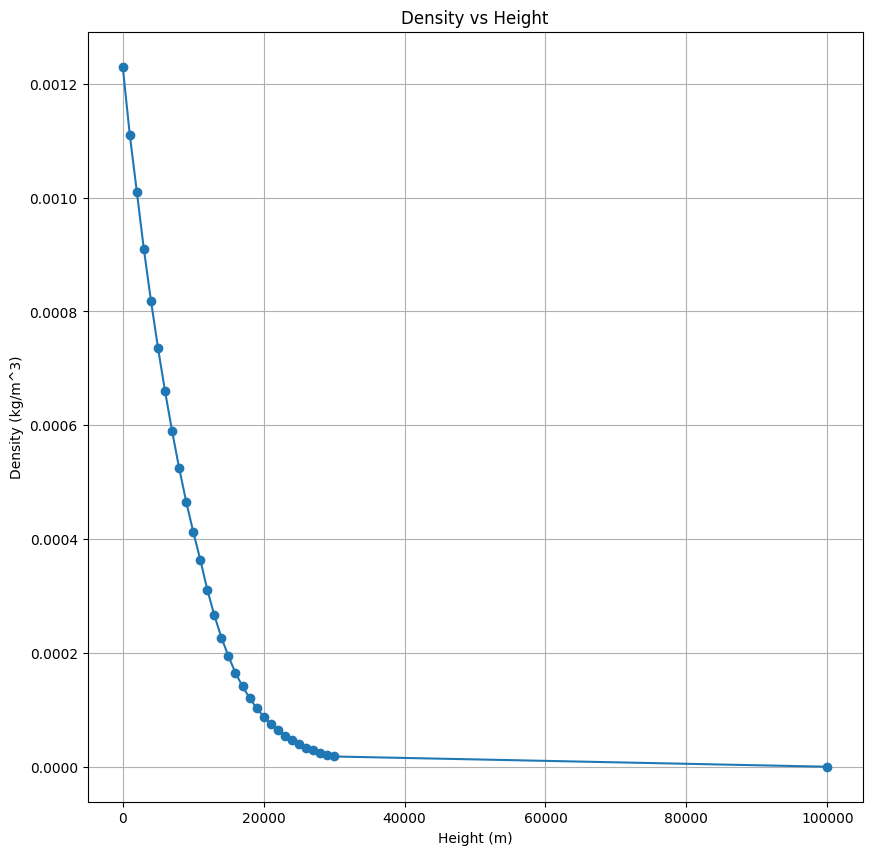

In [25]:
plt.figure(figsize=(10, 10))
plt.plot(height,density,marker = 'o')
plt.xlabel('Height (m)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density vs Height')
plt.grid()
plt.show()


In [49]:
from scipy.interpolate import interp1d
from scipy.integrate   import quad

f = interp1d(height, density*100, kind='linear')

def DepthAtHeight(height):
    if   isinstance(height, list)         : return              [quad(f, h, 100000)[0] for h in height]
    elif isinstance(height, np.ndarray)   : return np.array(    [quad(f, h, 100000)[0] for h in height])
    elif isinstance(height, torch.Tensor) : return torch.tensor([quad(f, h, 100000)[0] for h in height])
    elif isinstance(height,(int,float))   : return               quad(f, height,100000)[0]

SDDepth = DepthAtHeight(1400)
print(SDDepth)

925.2840365281199


<class 'numpy.ndarray'>
